<a href="https://colab.research.google.com/github/JerushDan/Ds/blob/main/Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Transport Demand Prediction

## Author :Jerush Dan


## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark


### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>train_revised.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.




### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/train_revised.csv')
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df.shape

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')


There are 51645 rows and 10 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df.duplicated().value_counts()

,count
False,51645


In [ ]:
df.isnull().sum()

,0
ride_id,0
seat_number,0
payment_method,0
payment_receipt,0
travel_date,0
travel_time,0
travel_from,0
travel_to,0
car_type,0
max_capacity,0


In the above data:
1. There are no duplicate rows
2. There are no null values

In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,AQN7FBUSGP,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [ ]:
df.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


## Data Wrangling

In [ ]:
df.head(3)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49


There is no specified target variable in the data.

According to business problem, it requires us to predict the number of tickets we can sell on a particular route and particular date and time. Hence, a new column is created for number of tickets by grouping the data on ride_id

In [ ]:
df['ride_id'].unique()

array([1442, 5437, 5710, ..., 8779, 8780, 8781])

In [ ]:
temporarydf = df.groupby('ride_id')['seat_number'].count().reset_index()
temporarydf.rename(columns = {'seat_number':'number_of_ticket'},inplace=True)
temporarydf.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


Dropping unnecessary columns

In [ ]:
df.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis=1, inplace=True)
df.shape

(16453, 6)

In [ ]:
df.drop_duplicates('ride_id',inplace=True)
df.shape

(2175, 6)

Merging the two df's on column ride_id.

In [ ]:
df = df.merge(temporarydf, how='left', on='ride_id')
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5
4,5778,27-11-17,7:12,Migori,Bus,49,31


In [ ]:
df['date_time'] = pd.to_datetime(df['travel_date'] +" "+ df['travel_time'])
df['travel_date'] = pd.to_datetime(df['travel_date'])


<ipython-input-9-52f36e4c63a6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_time'] = pd.to_datetime(df['travel_date'] +" "+ df['travel_time'])
<ipython-input-9-52f36e4c63a6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['travel_date'] = pd.to_datetime(df['travel_date'])


## Visualizations

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, ' Distribution of Tickets')

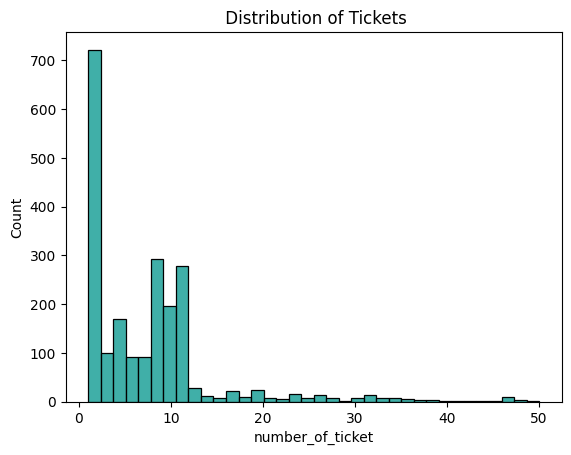

In [ ]:
sns.histplot(df['number_of_ticket'],color='#00948b')
plt.title(" Distribution of Tickets")

Text(0.5, 1.0, 'Types of Services')

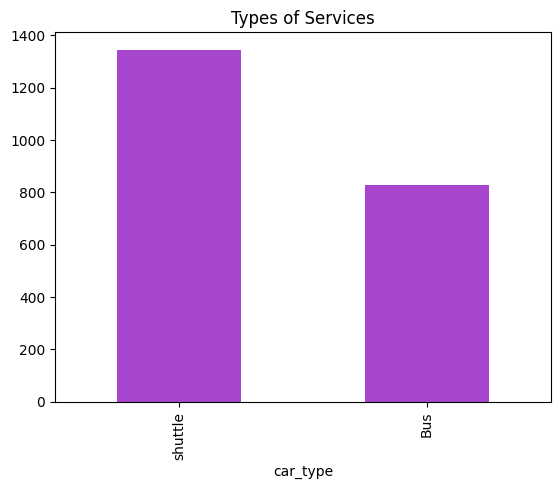

In [ ]:
df['car_type'].value_counts().plot(kind='bar',color='#a745ce')
plt.title("Types of Services")

Text(0.5, 1.0, 'Max Capacities')

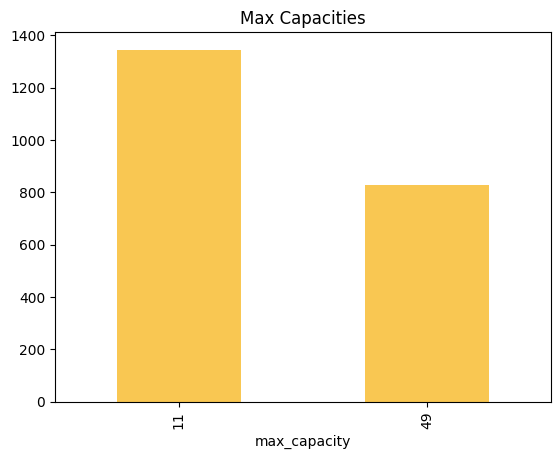

In [ ]:
df['max_capacity'].value_counts().plot(kind='bar',color='#f9c752')
plt.title("Max Capacities")

Text(0.5, 1.0, 'Total no.of tickets from each origin place')

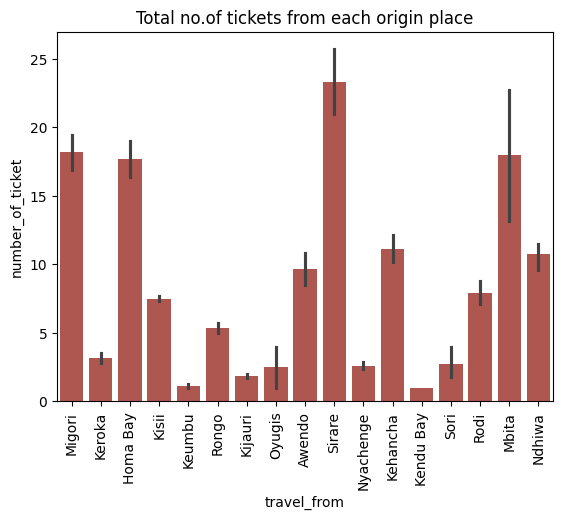

In [ ]:
sns.barplot(data=df,x='travel_from',y='number_of_ticket', color ='#bd4a41')
plt.xticks(rotation=90)
plt.title('Total no.of tickets from each origin place')

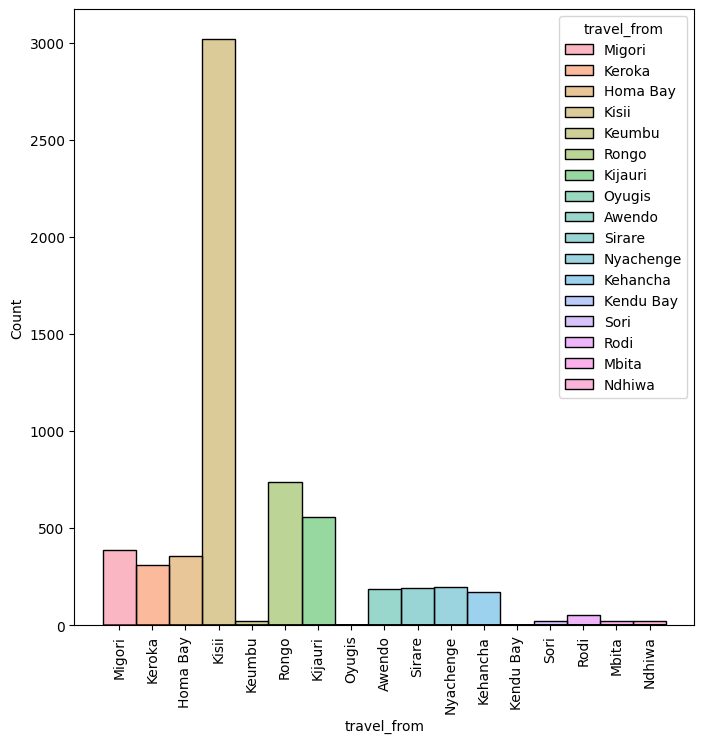

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=df,x='travel_from',hue='travel_from')
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.head(1)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00


In [ ]:
#Creating additonal features with travel_date and travel_time columns
def create_date_cols(df_temp):
  df_temp['travel_month'] = df_temp['travel_date'].dt.month
  df_temp['travel_year'] = df_temp['travel_date'].dt.year
  df_temp['travel_day_of_month'] = df_temp['travel_date'].dt.day
  df_temp['travel_day_of_year'] = df_temp['travel_date'].dt.dayofyear
  df_temp['travel_day_of_week'] = df_temp['travel_date'].dt.dayofweek
  df_temp['travel_hour'] = pd.to_datetime(df_temp['travel_time']).dt.hour
  df_temp['quarter'] = df_temp['travel_date'].dt.quarter
  df_temp['is_weekend'] = df_temp['travel_day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)

  return df_temp

df_copy = create_date_cols(df_copy)

In [ ]:
df_copy.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date_time', 'travel_month',
       'travel_year', 'travel_day_of_month', 'travel_day_of_year',
       'travel_day_of_week', 'travel_hour', 'quarter', 'is_weekend'],
      dtype='object')

In [ ]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0
1,5437,2017-11-19,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0
4,5778,2017-11-27,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0


In [ ]:
#Converting travel time into integer format
df['travel_time'] = df['travel_time'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60 )

In [ ]:
#Creating periods for time intervals
def get_period(hour):
  if hour<7: return 'em'
  elif hour>=7 and hour<=11: return 'mor'
  elif hour>11 and hour<=15: return 'an'
  elif hour>15 and hour<=19: return 'evn'
  elif hour>19 and hour<=24: return 'nght'

df_copy['time_period_of_day'] = df_copy['travel_hour'].apply(get_period)

In [ ]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0,mor
1,5437,2017-11-19,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1,mor
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1,mor
3,5777,2017-11-27,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0,mor
4,5778,2017-11-27,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0,mor


<Axes: xlabel='travel_day_of_week', ylabel='Count'>

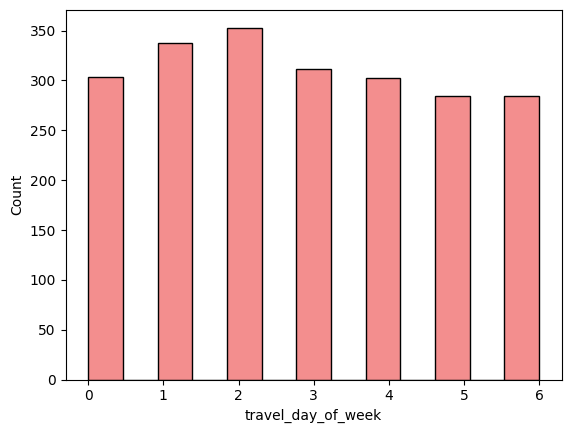

In [ ]:
sns.histplot(df_copy['travel_day_of_week'],color='#f06969')

<Axes: xlabel='travel_day_of_week', ylabel='number_of_ticket'>

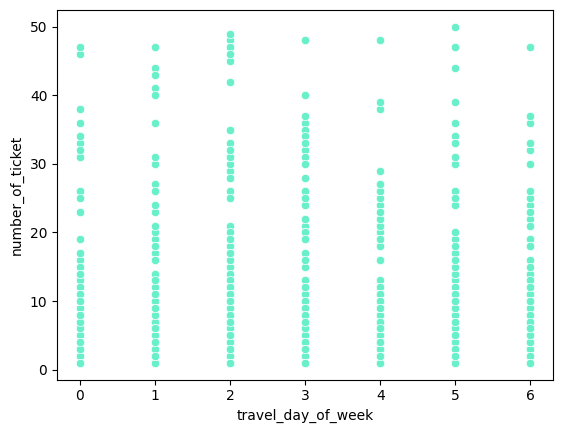

In [ ]:
sns.scatterplot(data=df_copy, x='travel_day_of_week',y='number_of_ticket',color='#69f0cb')

<Axes: xlabel='travel_day_of_month', ylabel='Count'>

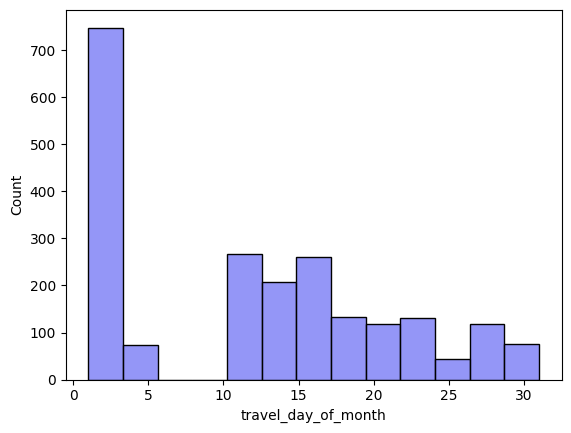

In [ ]:
sns.histplot(df_copy['travel_day_of_month'],color='#7173f5')

<Axes: xlabel='travel_day_of_month', ylabel='number_of_ticket'>

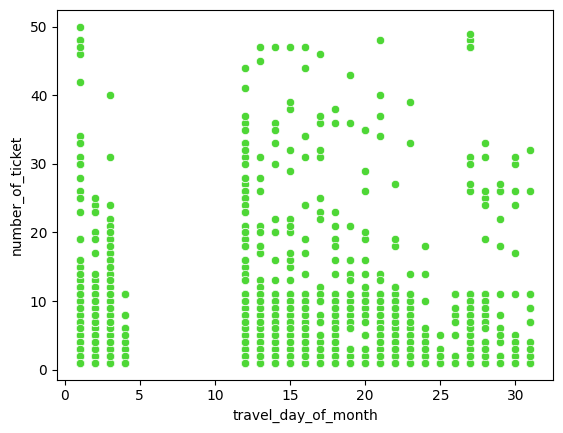

In [ ]:
sns.scatterplot(data=df_copy, x='travel_day_of_month',y='number_of_ticket',cmap='viridis',color='#4ed736')

<Axes: xlabel='travel_month', ylabel='Count'>

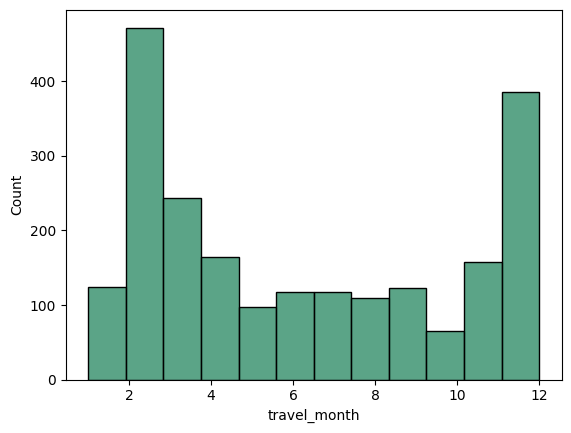

In [ ]:
sns.histplot(df_copy['travel_month'],bins=12,color='#24865f')

<Axes: xlabel='travel_hour', ylabel='number_of_ticket'>

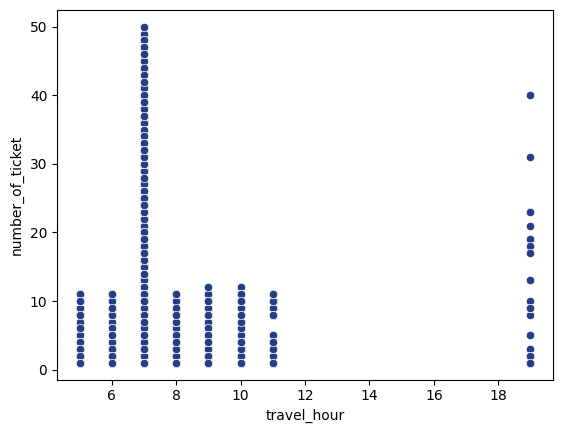

In [ ]:
sns.scatterplot(data=df_copy, x='travel_hour',y='number_of_ticket',cmap='viridis',color='#243d86')

<Axes: xlabel='time_period_of_day', ylabel='number_of_ticket'>

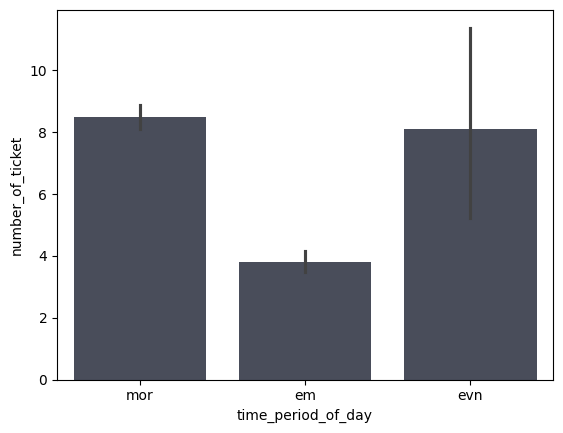

In [ ]:
sns.barplot(data=df_copy, x='time_period_of_day',y='number_of_ticket',color='#464c5d')

<Axes: xlabel='travel_day_of_year', ylabel='number_of_ticket'>

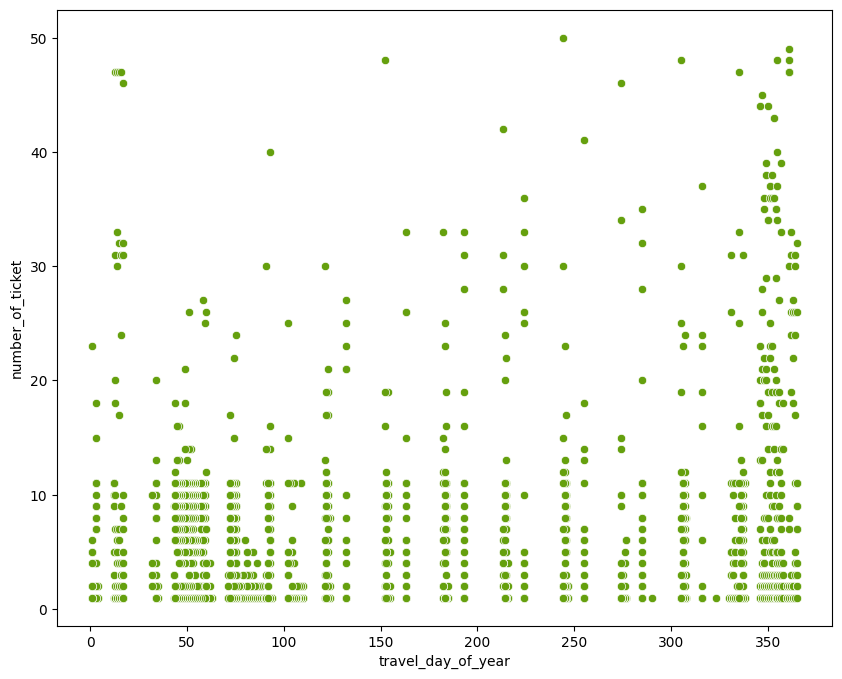

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_copy, x='travel_day_of_year',y='number_of_ticket',cmap='viridis',color='#65a00e')

From the above charts we can see that:

1. Ticket sales peak during the months of December, January, and February, indicating a seasonal trend in public transportation usage.
2. There’s a consistent dip in ticket purchases between the 5th and 11th of each month, suggesting that public transport might be inactive or limited during this period.

3. Mondays and Tuesdays see the highest ticket activity, likely due to the start of the workweek when commuter traffic is at its peak.

4. Early morning (around 7 AM) and evening hours (around 7 PM) record the most ticket sales, which aligns with typical work commute times in Nairobi. Conversely, the midday period between 12 PM and 5:30 PM sees little to no sales.

5. Evening travel is more popular than morning travel, showing a heavier reliance on public transport at the end of the day.

In [ ]:
df_copy.head(1)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0,mor


Text(0.5, 1.0, 'Number of tickets for each day of the month')

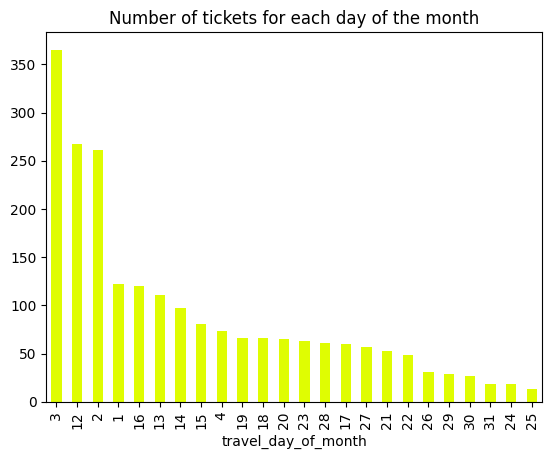

In [ ]:
df_copy['travel_day_of_month'].value_counts().plot(kind='bar',color ='#dffd02')
plt.title('Number of tickets for each day of the month')

{'mor': np.int64(1720), 'em': np.int64(421), 'evn': np.int64(34)}


<Axes: xlabel='time_period_of_day'>

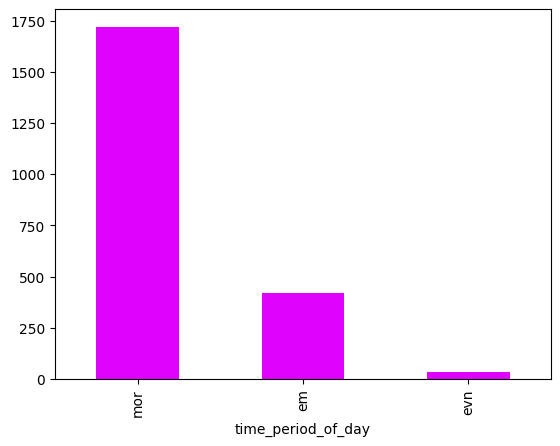

In [ ]:
print(dict(df_copy.time_period_of_day.value_counts()))

df_copy['time_period_of_day'].value_counts().plot(kind='bar',color='#df02fd')

In [ ]:
period_dict = dict(df_copy.time_period_of_day.value_counts())
df_copy['travel_hour_wise_weights'] = np.log1p(df_copy.time_period_of_day.map(period_dict))

# Creating a seperate column for giving day of a year wise weights for the hours column
day_of_year_dict = dict(df_copy.travel_day_of_year.value_counts())
df_copy['travel_day_of_year_wise_weights'] = np.log1p(df_copy.travel_day_of_year.map(day_of_year_dict))

# Giving weights to the each days of the month based on the frequency of ticket bookings
day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
df_copy['travel_day_of_month_wise_weights'] = df_copy.travel_day_of_month.replace(day_of_month_wise_weights_dict)

# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
travel_month_wise_weights_dict = {12: 1,
 2: 1,
 1: 1,
 3: 1,
 4: 1,
 11: 2,
 9: 3,
 7: 3,
 8: 3,
 10: 3,
 6: 3,
 5: 3}
df_copy['travel_month_wise_weights'] = df_copy.travel_month.replace(travel_month_wise_weights_dict)

In [ ]:
# Assigning frequency-based weights for time_period_of_day
time_weights = df_copy['time_period_of_day'].value_counts().to_dict()
df_copy['travel_hour_wise_weights'] = df_copy['time_period_of_day'].apply(lambda x: np.log1p(time_weights.get(x, 0)))

# Assigning frequency-based weights for travel_day_of_year
day_year_weights = df_copy['travel_day_of_year'].value_counts().to_dict()
df_copy['travel_day_of_year_wise_weights'] = df_copy['travel_day_of_year'].apply(lambda x: np.log1p(day_year_weights.get(x, 0)))

# Applying predefined weights for each day of the month
day_month_weights = {
    2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3,
    17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4
}
df_copy['travel_day_of_month_wise_weights'] = df_copy['travel_day_of_month'].map(day_month_weights)

# Mapping month-wise weights using a dictionary
month_weights = {
    12: 1, 2: 1, 1: 1, 3: 1, 4: 1,
    11: 2, 9: 3, 7: 3, 8: 3, 10: 3,
    6: 3, 5: 3
}
df_copy['travel_month_wise_weights'] = df_copy['travel_month'].map(month_weights)


In [ ]:
df_copy.head(3)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,...,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day,travel_hour_wise_weights,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights
0,1442,2017-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,10,2017,...,290,1,7,4,0,mor,7.450661,0.693147,3,3
1,5437,2017-11-19,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,11,2017,...,323,6,7,4,1,mor,7.450661,0.693147,3,2
2,5710,2017-11-26,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,11,2017,...,330,6,7,4,1,mor,7.450661,0.693147,4,2


In [ ]:
def find_difference_bw_bus(data):

  data.sort_values(["travel_from","date_time"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date_time.shift(-1)-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")


  return data

In [ ]:
def compute_bus_time_gaps(df):
    # Sort data for accurate time calculations
    df.sort_values(by=["travel_from", "date_time"], ascending=True, inplace=True)

    # Define the shifts to calculate gaps for
    shift_range = [1, 2, 3]
    for shift in shift_range:
        df[f"gap_to_next_bus_{shift}"] = (
            df["date_time"] - df.groupby("travel_from")["date_time"].shift(-shift)
        ).dt.total_seconds() / 3600

        df[f"gap_to_prev_bus_{shift}"] = (
            df["date_time"] - df.groupby("travel_from")["date_time"].shift(shift)
        ).dt.total_seconds() / 3600

    # Time gap between the next and previous bus (1-step)
    next_dt = df.groupby("travel_from")["date_time"].shift(-1)
    prev_dt = df.groupby("travel_from")["date_time"].shift(1)
    df["gap_between_next_prev_bus"] = (next_dt - prev_dt).dt.total_seconds() / 3600

    # Fill missing values with forward and backward fill
    gap_columns = [col for col in df.columns if col.startswith("gap_")]
    df[gap_columns] = df.groupby("travel_from")[gap_columns].ffill()
    df[gap_columns] = df.groupby("travel_from")[gap_columns].bfill()

    return df


In [ ]:
transport_data_new = find_difference_bw_bus(df_copy)

In [ ]:
transport_data_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date_time', 'travel_month',
       'travel_year', 'travel_day_of_month', 'travel_day_of_year',
       'travel_day_of_week', 'travel_hour', 'quarter', 'is_weekend',
       'time_period_of_day', 'travel_hour_wise_weights',
       'travel_day_of_year_wise_weights', 'travel_day_of_month_wise_weights',
       'travel_month_wise_weights', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus'],
      dtype='object')

In [ ]:
transport_data_new.isnull().sum()

,0
ride_id,0
travel_date,0
travel_time,0
travel_from,0
car_type,0
max_capacity,0
number_of_ticket,0
date_time,0
travel_month,0
travel_year,0


In [ ]:
transport_data_new.dropna(inplace=True)

In [ ]:
from datetime import datetime
from datetime import timedelta

In [ ]:
transport_data_new['travel_from'].unique()

array(['Awendo', 'Homa Bay', 'Kehancha', 'Keroka', 'Keumbu', 'Kijauri',
       'Kisii', 'Migori', 'Nyachenge', 'Rongo', 'Sirare'], dtype=object)

In [ ]:


# Making a dictionary containing distances of originating places from nairobi
distance_from_nairobi = {'Awendo':351, 'Homa Bay':360, 'Kehancha': 387.7, 'Keroka': 280, 'Keumbu':295, 'Kijauri':271,
                         'Kisii':305.1, 'Mbita':401, 'Migori': 370, 'Ndhiwa': 371, 'Nyachenge':326, 'Rodi':348, 'Rongo':332,
                         'Sirare':392, 'Sori':399}

transport_data_new['distance_to_destination'] = transport_data_new['travel_from'].map(distance_from_nairobi)

In [ ]:
dict_time = dict(transport_data_new.groupby('travel_from')['travel_hour'].mean().round(2))
dict_time

{'Awendo': np.float64(7.0),
 'Homa Bay': np.float64(7.0),
 'Kehancha': np.float64(7.0),
 'Keroka': np.float64(6.89),
 'Keumbu': np.float64(5.33),
 'Kijauri': np.float64(7.3),
 'Kisii': np.float64(7.93),
 'Migori': np.float64(7.0),
 'Nyachenge': np.float64(7.0),
 'Rongo': np.float64(7.0),
 'Sirare': np.float64(7.0)}

In [ ]:
transport_data_new.groupby('travel_from')['travel_hour_wise_weights'].mean()

,travel_hour_wise_weights
travel_from,
Awendo,7.450661
Homa Bay,7.450661
Kehancha,7.450661
Keroka,6.876086
Keumbu,6.123097
Kijauri,6.733992
Kisii,7.077211
Migori,7.450661
Nyachenge,7.450661


In [ ]:
transport_data_new['time_to_nairobi'] = transport_data_new['travel_hour']

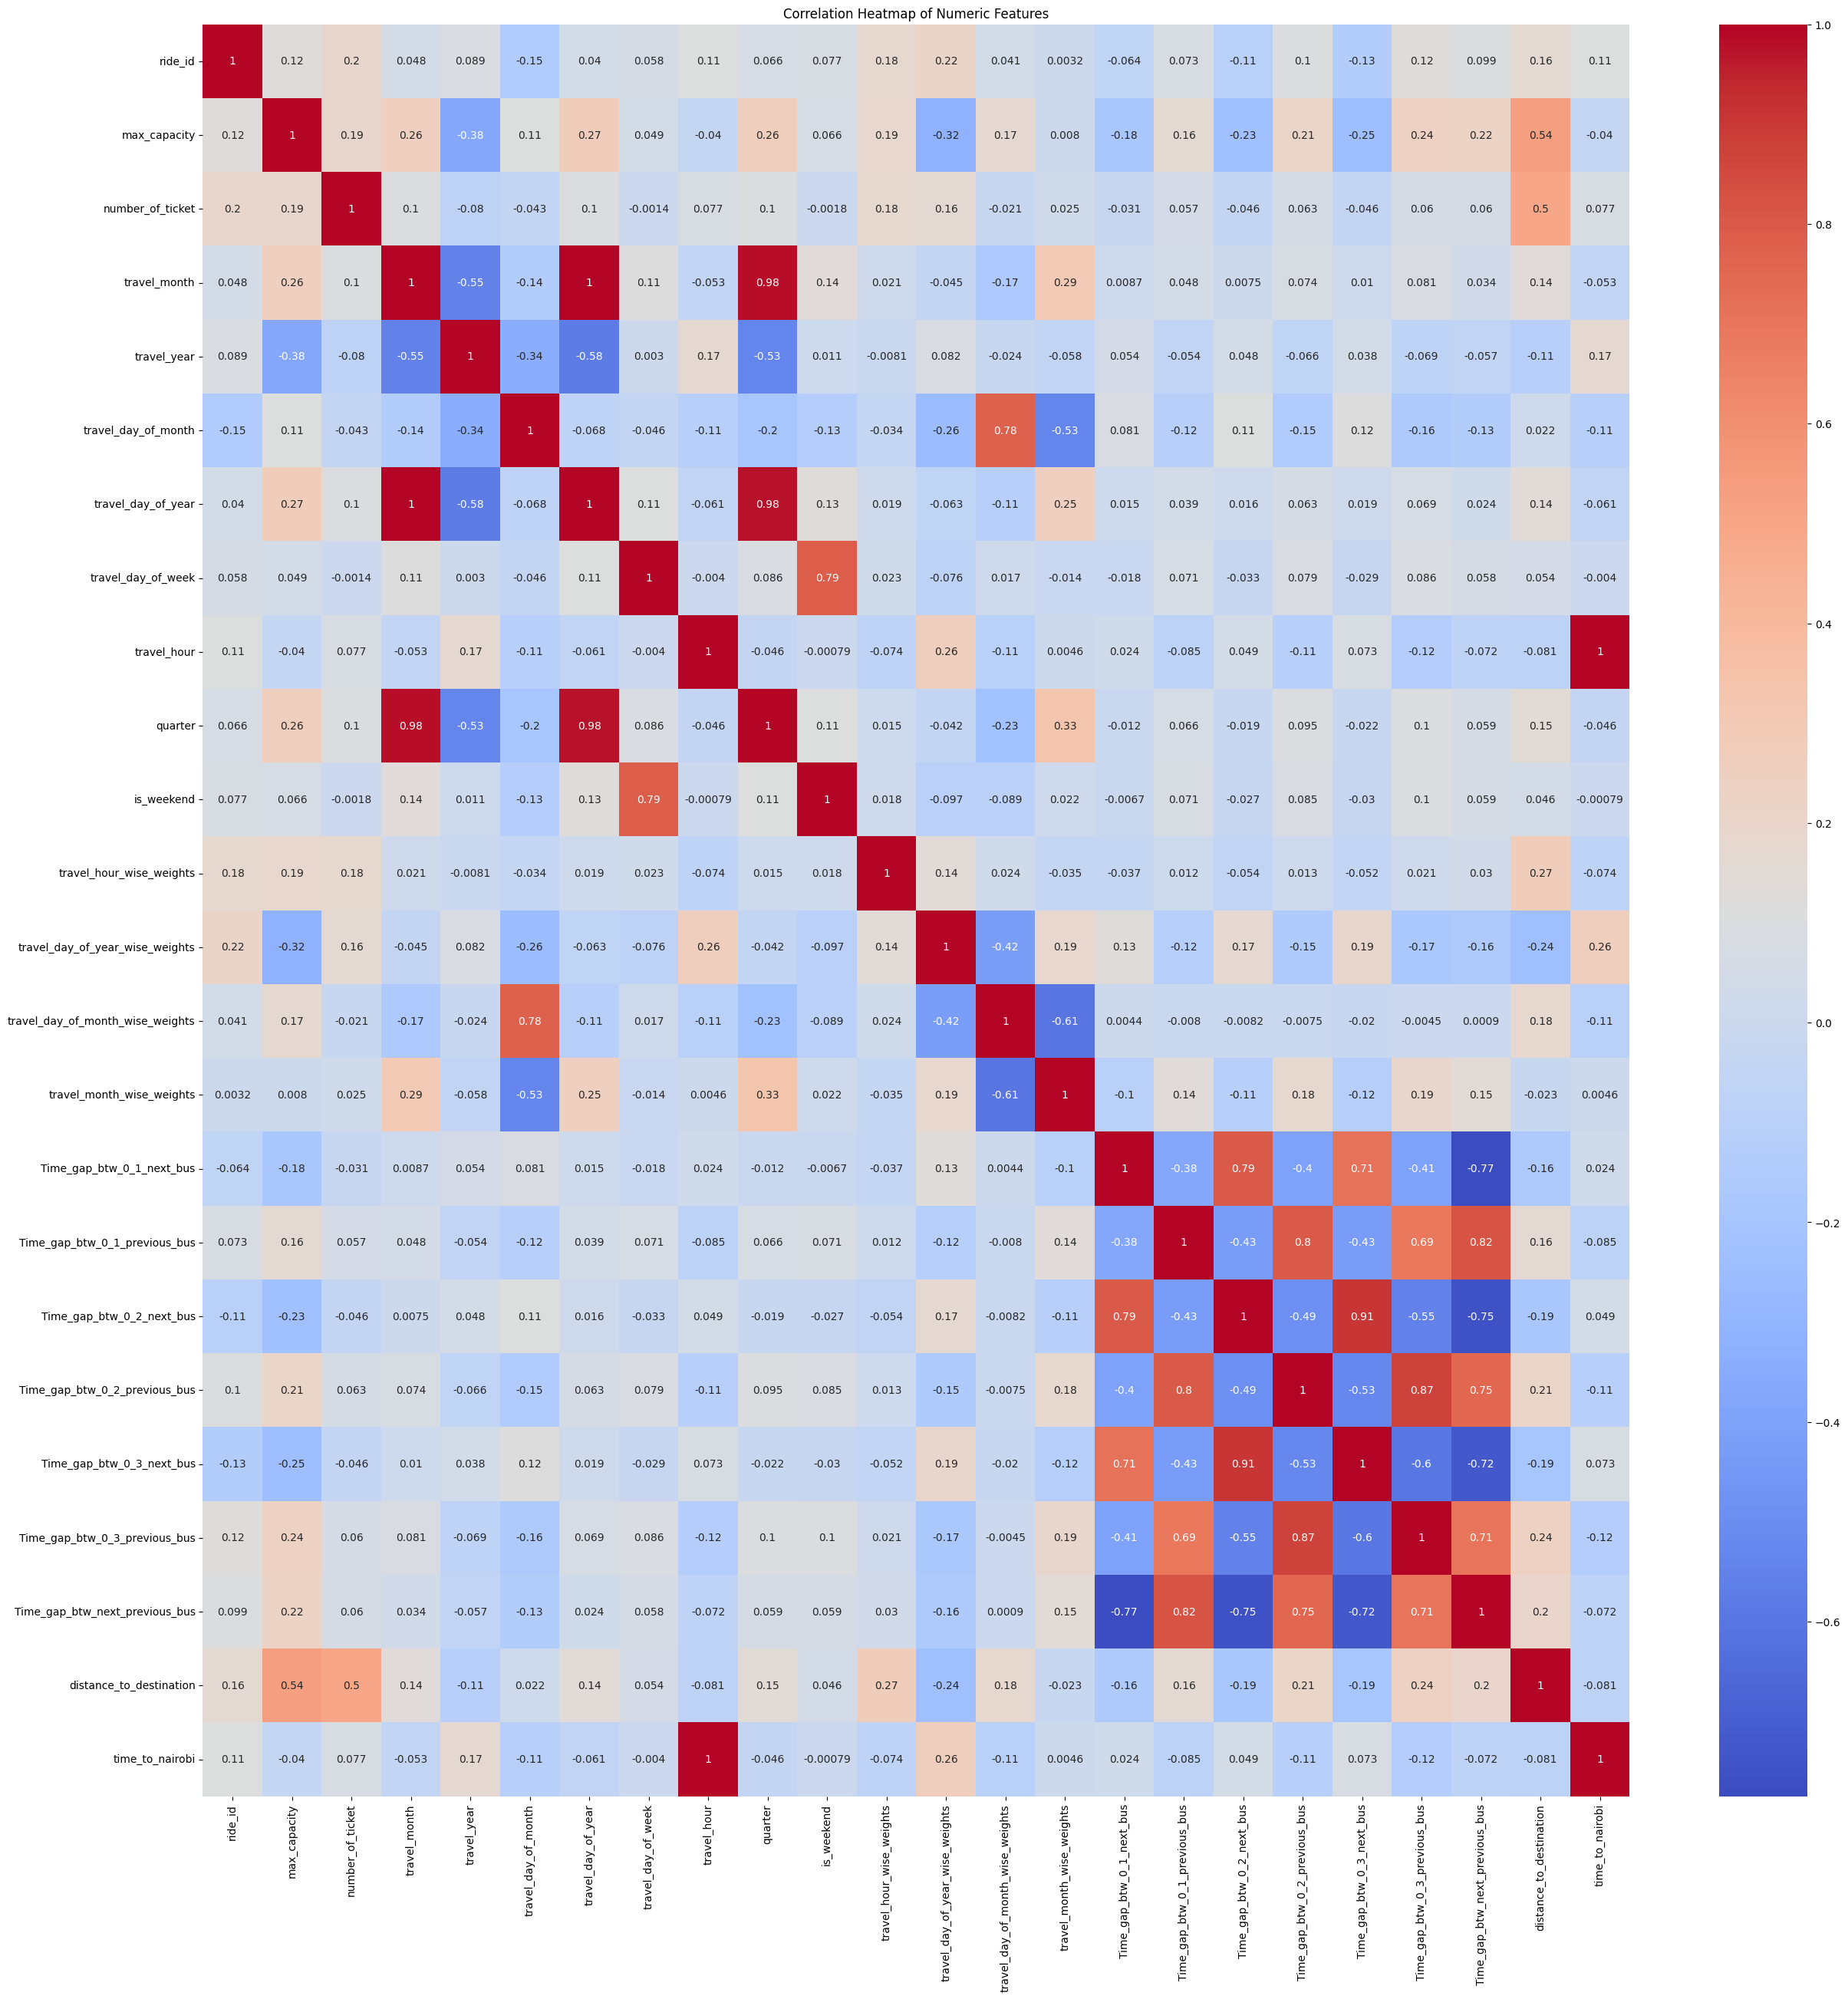

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = transport_data_new.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


## Encoding

In [ ]:
from sklearn import preprocessing
final_df = pd.get_dummies(df_copy, columns = ['travel_from','travel_day_of_month_wise_weights','travel_month_wise_weights'])

In [ ]:
label_encoder = {'Bus':1,'shuttle':0}
final_df.replace(label_encoder, inplace=True)
final_df.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,...,travel_from_Nyachenge,travel_from_Rongo,travel_from_Sirare,travel_day_of_month_wise_weights_1,travel_day_of_month_wise_weights_2,travel_day_of_month_wise_weights_3,travel_day_of_month_wise_weights_4,travel_month_wise_weights_1,travel_month_wise_weights_2,travel_month_wise_weights_3
502,6654,2017-05-12,7:08,1,49,2,2017-05-12 07:08:00,5,2017,12,...,False,False,False,True,False,False,False,False,False,True
2060,8627,2018-01-13,7:08,1,49,20,2018-01-13 07:08:00,1,2018,13,...,False,False,False,False,False,True,False,True,False,False
2061,8628,2018-01-13,7:15,1,49,2,2018-01-13 07:15:00,1,2018,13,...,False,False,False,False,False,True,False,True,False,False
2092,8667,2018-01-14,7:08,1,49,6,2018-01-14 07:08:00,1,2018,14,...,False,False,False,False,False,True,False,True,False,False
2091,8666,2018-01-14,7:15,1,49,1,2018-01-14 07:15:00,1,2018,14,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
cols_to_drop = ['ride_id','travel_date','travel_time','max_capacity','travel_year','number_of_ticket','time_period_of_day','date_time']
X = final_df.drop(cols_to_drop,axis=1)
X.shape

(2173, 37)

In [ ]:
y = final_df['number_of_ticket'].values
y.shape

(2173,)

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
import math

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1738, 37)

In [ ]:
y_train.shape

(1738,)

In [ ]:
#Creating function for evaluation metrics
def evaluate_metric(actual,predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))

  print('R2 Score is {}'.format(r2_score(actual, predicted)))
  # print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  # print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

## Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.score(X_train,y_train)

0.48335442102268433

In [ ]:
y_train_pred = regressor.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 30.296826886033287
RMSE is 5.5042553434623
R2 Score is 0.48335442102268433
Adjusted R2 :  0.4721097819508251


In [ ]:
#evaluate test
y_test_pred = regressor.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 31.288008373375767
RMSE is 5.593568482943224
R2 Score is 0.5230131473126978
Adjusted R2 :  0.4785584532335285


## Lasso

In [ ]:
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.41300065686971477

In [ ]:
y_train_pred = lasso.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 34.422471041437774
RMSE is 5.867066647093569
R2 Score is 0.41300065686971477
Adjusted R2 :  0.4002247888133498


In [ ]:
#evaluate test
y_test_pred = lasso.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 39.36529191639293
RMSE is 6.274176592700665
R2 Score is 0.3998746589349855
Adjusted R2 :  0.3439435818080194


## Lasso GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -31.685975495250066


In [ ]:
y_train_pred = lasso_regressor.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 30.401373226020308
RMSE is 5.513744029787773
R2 Score is 0.48157161371564405
Adjusted R2 :  0.4702881723671022


In [ ]:
#evaluate test
y_test_pred = lasso_regressor.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 31.984938924045057
RMSE is 5.655522869200076
R2 Score is 0.512388415116952
Adjusted R2 :  0.4669435067021591


## Ridge GridSearchCV

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -31.7109943471051


In [ ]:
y_train_pred = ridge_regressor.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 30.337257041474874
RMSE is 5.507926746197236
R2 Score is 0.4826649738688673
Adjusted R2 :  0.4714053291824839


In [ ]:
#evaluate test
y_test_pred = ridge_regressor.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 31.738980803280324
RMSE is 5.633735954345067
R2 Score is 0.5161380558264669
Adjusted R2 :  0.4710426101478252


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

criterion = ['squared_error', 'friedman_mse', 'absolute_error']

max_depth = [int(x) for x in np.linspace(40, 100, num = 4)]
max_depth.append(None)

grid_params_dict = {'criterion': criterion,
               'max_depth': max_depth,
                    }
print(grid_params_dict)

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'], 'max_depth': [40, 60, 80, 100, None]}


In [ ]:
dt_reg = DecisionTreeRegressor()

df_grid_reg = GridSearchCV(estimator=dt_reg, param_grid=grid_params_dict, cv=3, verbose=2, n_jobs=-1)

df_grid_reg.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [40, 60, 80, 100, None]},
             verbose=2)

In [ ]:
df_grid_reg.best_params_

{'criterion': 'absolute_error', 'max_depth': 60}

In [ ]:
df_grid_reg.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=60)

In [ ]:
df_optimal_model =df_grid_reg.best_estimator_
y_train_pred = df_optimal_model.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 0.6579401611047181
RMSE is 0.8111351065665436
R2 Score is 0.9887802812900159
Adjusted R2 :  0.9885360874122104


In [ ]:
y_test_pred = df_optimal_model.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 50.3132183908046
RMSE is 7.093181119272551
R2 Score is 0.23297311217737093
Adjusted R2 :  0.1614869790553627


##Random Forest RandomSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 4)]
max_depth.append(None)

# Create the parameters grid
grid_params_dict = {'n_estimators': n_estimators,
               'max_depth': max_depth,
                    }
print(grid_params_dict)

{'n_estimators': [400, 600, 800, 1000], 'max_depth': [40, 60, 80, 100, None]}


In [ ]:

rfr = RandomForestRegressor(random_state=42)
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Your base estimator
rfr = RandomForestRegressor(random_state=42)

# Same parameter “grid” you had, but treated as distributions
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Use RandomizedSearchCV: 20 iterations, 3‑fold CV
rand_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_distributions,
    n_iter=20,            # number of random parameter settings to try
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on your data
rand_search.fit(X, y)

print("Best params:", rand_search.best_params_)
print("Best CV score:", rand_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Best CV score: 0.3219156478959568


In [ ]:
# Import necessary libraries
import numpy as np
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Define evaluation function ---
def evaluate_metric(y_true, y_pred):
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))

# --- Split the data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Random Forest Model ---
rfr = RandomForestRegressor(random_state=42)
print('Parameters currently in use:\n')
pprint(rfr.get_params())

# --- Define parameter distributions for RandomizedSearchCV ---
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

#  Running RandomizedSearchCV
rand_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rand_search.fit(X_train, y_train)

#  Print best results from RandomizedSearchCV
print("Best params:", rand_search.best_params_)
print("Best CV score:", rand_search.best_score_)

#  Get best model and predict
best_rf_model = rand_search.best_estimator_

y_train_pred = best_rf_model.predict(X_train)
print("\n--- Train Set Evaluation ---")
evaluate_metric(y_train, y_train_pred)
print("Adjusted R2 (Train):", 1 - (1 - r2_score(y_train, y_train_pred)) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)))

y_test_pred = best_rf_model.predict(X_test)
print("\n--- Test Set Evaluation ---")
evaluate_metric(y_test, y_test_pred)
print("Adjusted R2 (Test):", 1 - (1 - r2_score(y_test, y_test_pred)) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)))


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best CV score: 0.586614148848936

--- Train Set Evaluation ---
MSE: 7.2468067800838725
MAE: 1.701832264542132
R2 Score: 0.8764216893499447
Adjusted R2 (Train): 0.8737320437652082

--- Test Set Evaluation ---
MSE: 20.875115544832518
MAE: 3.0388461099564545
R2 Score: 0.6817580862166226
Adjusted R2 (Test): 0.6520982604987764


## XGBoost GridSearchCV

In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(xgbr.get_params())

Parameters currently in use:

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [ ]:
# Maximum number of levels in tree
max_depth= [6, 8, 10, 12]
min_child_weight= [7, 8, 10, 12]

# Create the random grid
xgb_grid_params_dict = {
         'max_depth': max_depth,
         'min_child_weight': min_child_weight,
                         }
pprint(xgb_grid_params_dict)

{'max_depth': [6, 8, 10, 12], 'min_child_weight': [7, 8, 10, 12]}


In [ ]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state = 3)

# Grid Search of parameters, using 3 fold cross validation,
xgbr_grid = GridSearchCV(estimator = xgbr, param_grid = xgb_grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Grid Search model
xgbr_grid.fit(X, y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=3, ...),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_child_weight': [7, 8, 10, 12]},
             verbose=2)

In [ ]:
xgbr_grid.best_params_

{'max_depth': 8, 'min_child_weight': 12}

In [ ]:
xgbr_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=12, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=3, ...)

In [ ]:
xgbr_optimal_model =xgbr_grid.best_estimator_
y_train_pred = xgbr_optimal_model.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 2.73665452003479
RMSE is 1.6542836878947909
R2 Score is 0.9533323645591736
Adjusted R2 :  0.9523166571995791


In [ ]:
y_test_pred = xgbr_optimal_model.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 2.7142839431762695
RMSE is 1.6475084045844104
R2 Score is 0.9586206674575806
Adjusted R2 :  0.9547641553566498


## Important Features

In [ ]:
importances = xgbr_optimal_model.feature_importances_

In [ ]:
importance_dict = {'Feature' : list(X_train.columns), 'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [ ]:
imp_features = important_features['Feature'].tolist()
print(f"Import Features are: {imp_features}")

Import Features are: ['distance_to_destination', 'Time_gap_btw_next_previous_bus', 'travel_from_Kisii', 'travel_from_Migori', 'travel_day_of_year_wise_weights', 'Time_gap_btw_0_1_next_bus', 'travel_from_Kehancha', 'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_1_previous_bus', 'travel_hour', 'travel_month', 'Time_gap_btw_0_2_next_bus', 'Time_gap_btw_0_3_next_bus', 'travel_day_of_month_wise_weights_3', 'travel_hour_wise_weights', 'travel_month_wise_weights_3', 'travel_day_of_year', 'Time_gap_btw_0_3_previous_bus', 'travel_day_of_week', 'travel_day_of_month']


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5')])

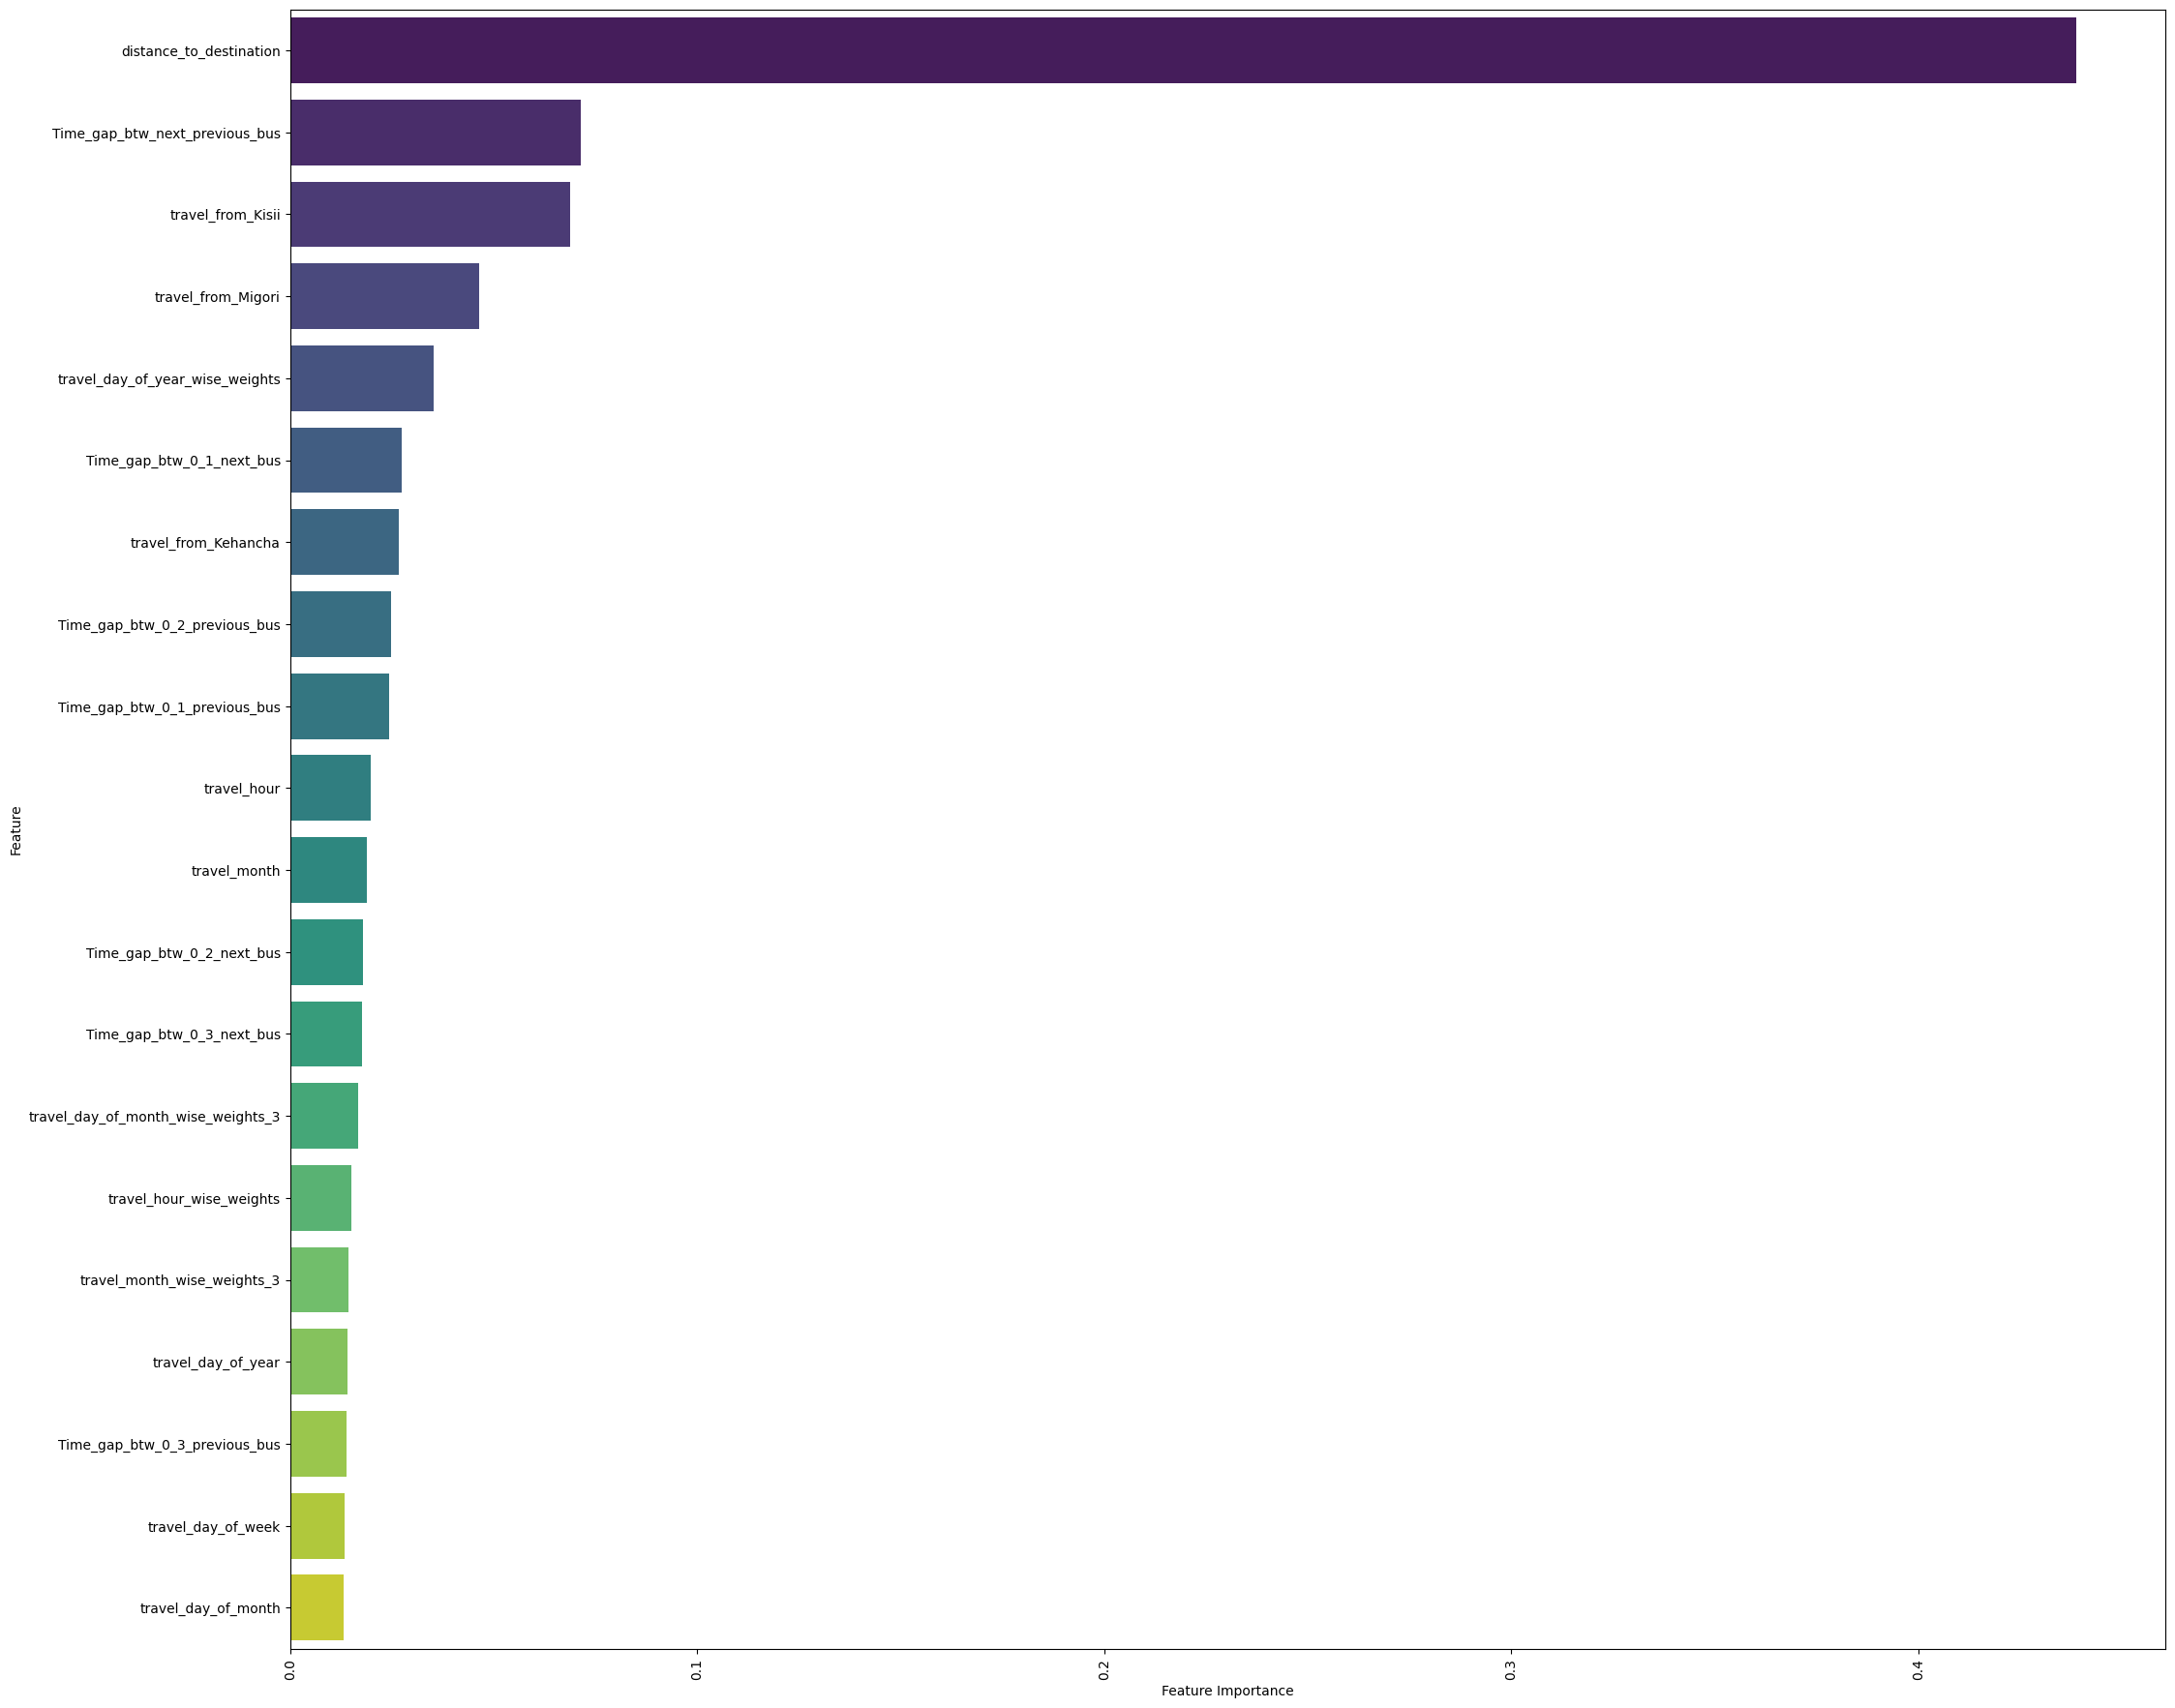

In [ ]:
#plotting the important fetures obtainind fro the optimal XGB model
fig = plt.figure(figsize=(25,22))
sns.barplot(x = 'Feature Importance', y = 'Feature', data=important_features, palette= 'viridis')
#sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)